<a href="https://colab.research.google.com/gist/hackviggy/46badd1705caeffa36d6eda7943c6677/untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data = pd.read_csv('cancer.csv', dtype={'output':str})
data.head()

output  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0      1        17.99  ...          0.4601                  0.11890
1      1        20.57  ...          0.2750                  0.08902
2      1        19.69  ...          0.3613                  0.08758
3      1        11.42  ...          0.6638                  0.17300
4      1        20.29  ...          0.2364                  0.07678

[5 rows x 31 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 31 columns):
output                     419 non-null object
radius_mean                419 non-null float64
texture_mean               419 non-null float64
perimeter_mean             419 non-null float64
area_mean                  419 non-null float64
smoothness_mean            419 non-null float64
compactness_mean           419 non-null float64
concavity_mean             419 non-null float64
concave points_mean        419 non-null float64
symmetry_mean              419 non-null float64
fractal_dimension_mean     419 non-null float64
radius_se                  419 non-null float64
texture_se                 419 non-null float64
perimeter_se               419 non-null float64
area_se                    419 non-null float64
smoothness_se              419 non-null float64
compactness_se             419 non-null float64
concavity_se               419 non-null float64
concave points_se          419 n

0    242
1    177
Name: output, dtype: int64


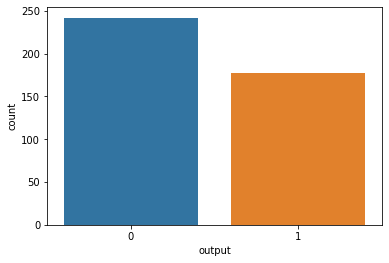

In [4]:
print(data['output'].value_counts()) # prints out how many times each value in the 'label' column is appearing.
sns.countplot(data['output'])

In [5]:
data.describe()

radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
count   419.000000    419.000000  ...      419.000000               419.000000
mean     14.267711     18.949905  ...        0.296066                 0.084342
std       3.543113      4.122422  ...        0.065929                 0.018834
min       6.981000      9.710000  ...        0.156500                 0.055040
25%      11.800000     15.915000  ...        0.255250                 0.071270
50%      13.450000     18.600000  ...        0.285300                 0.080190
75%      16.150000     21.565000  ...        0.322750                 0.092320
max      28.110000     39.280000  ...        0.663800                 0.207500

[8 rows x 30 columns]

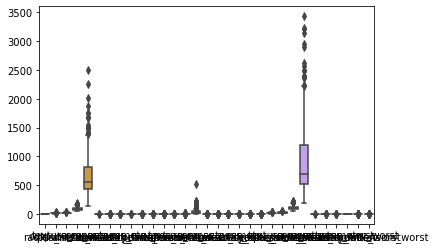

In [6]:
sns.boxplot(data=data)

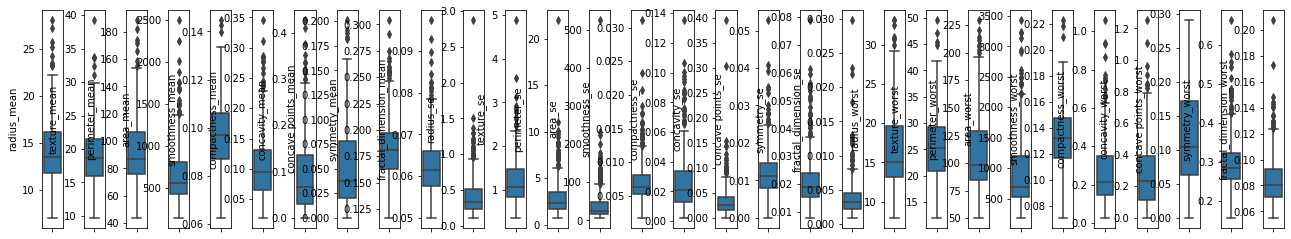

In [7]:
data_to_plot = data.iloc[:, 1:]
fig, ax = plt.subplots(ncols=len(data_to_plot.columns))
plt.subplots_adjust(right=3, wspace=1)
for i, col in enumerate(data_to_plot.columns):
    sns.boxplot(y=data_to_plot[col], ax = ax[i])

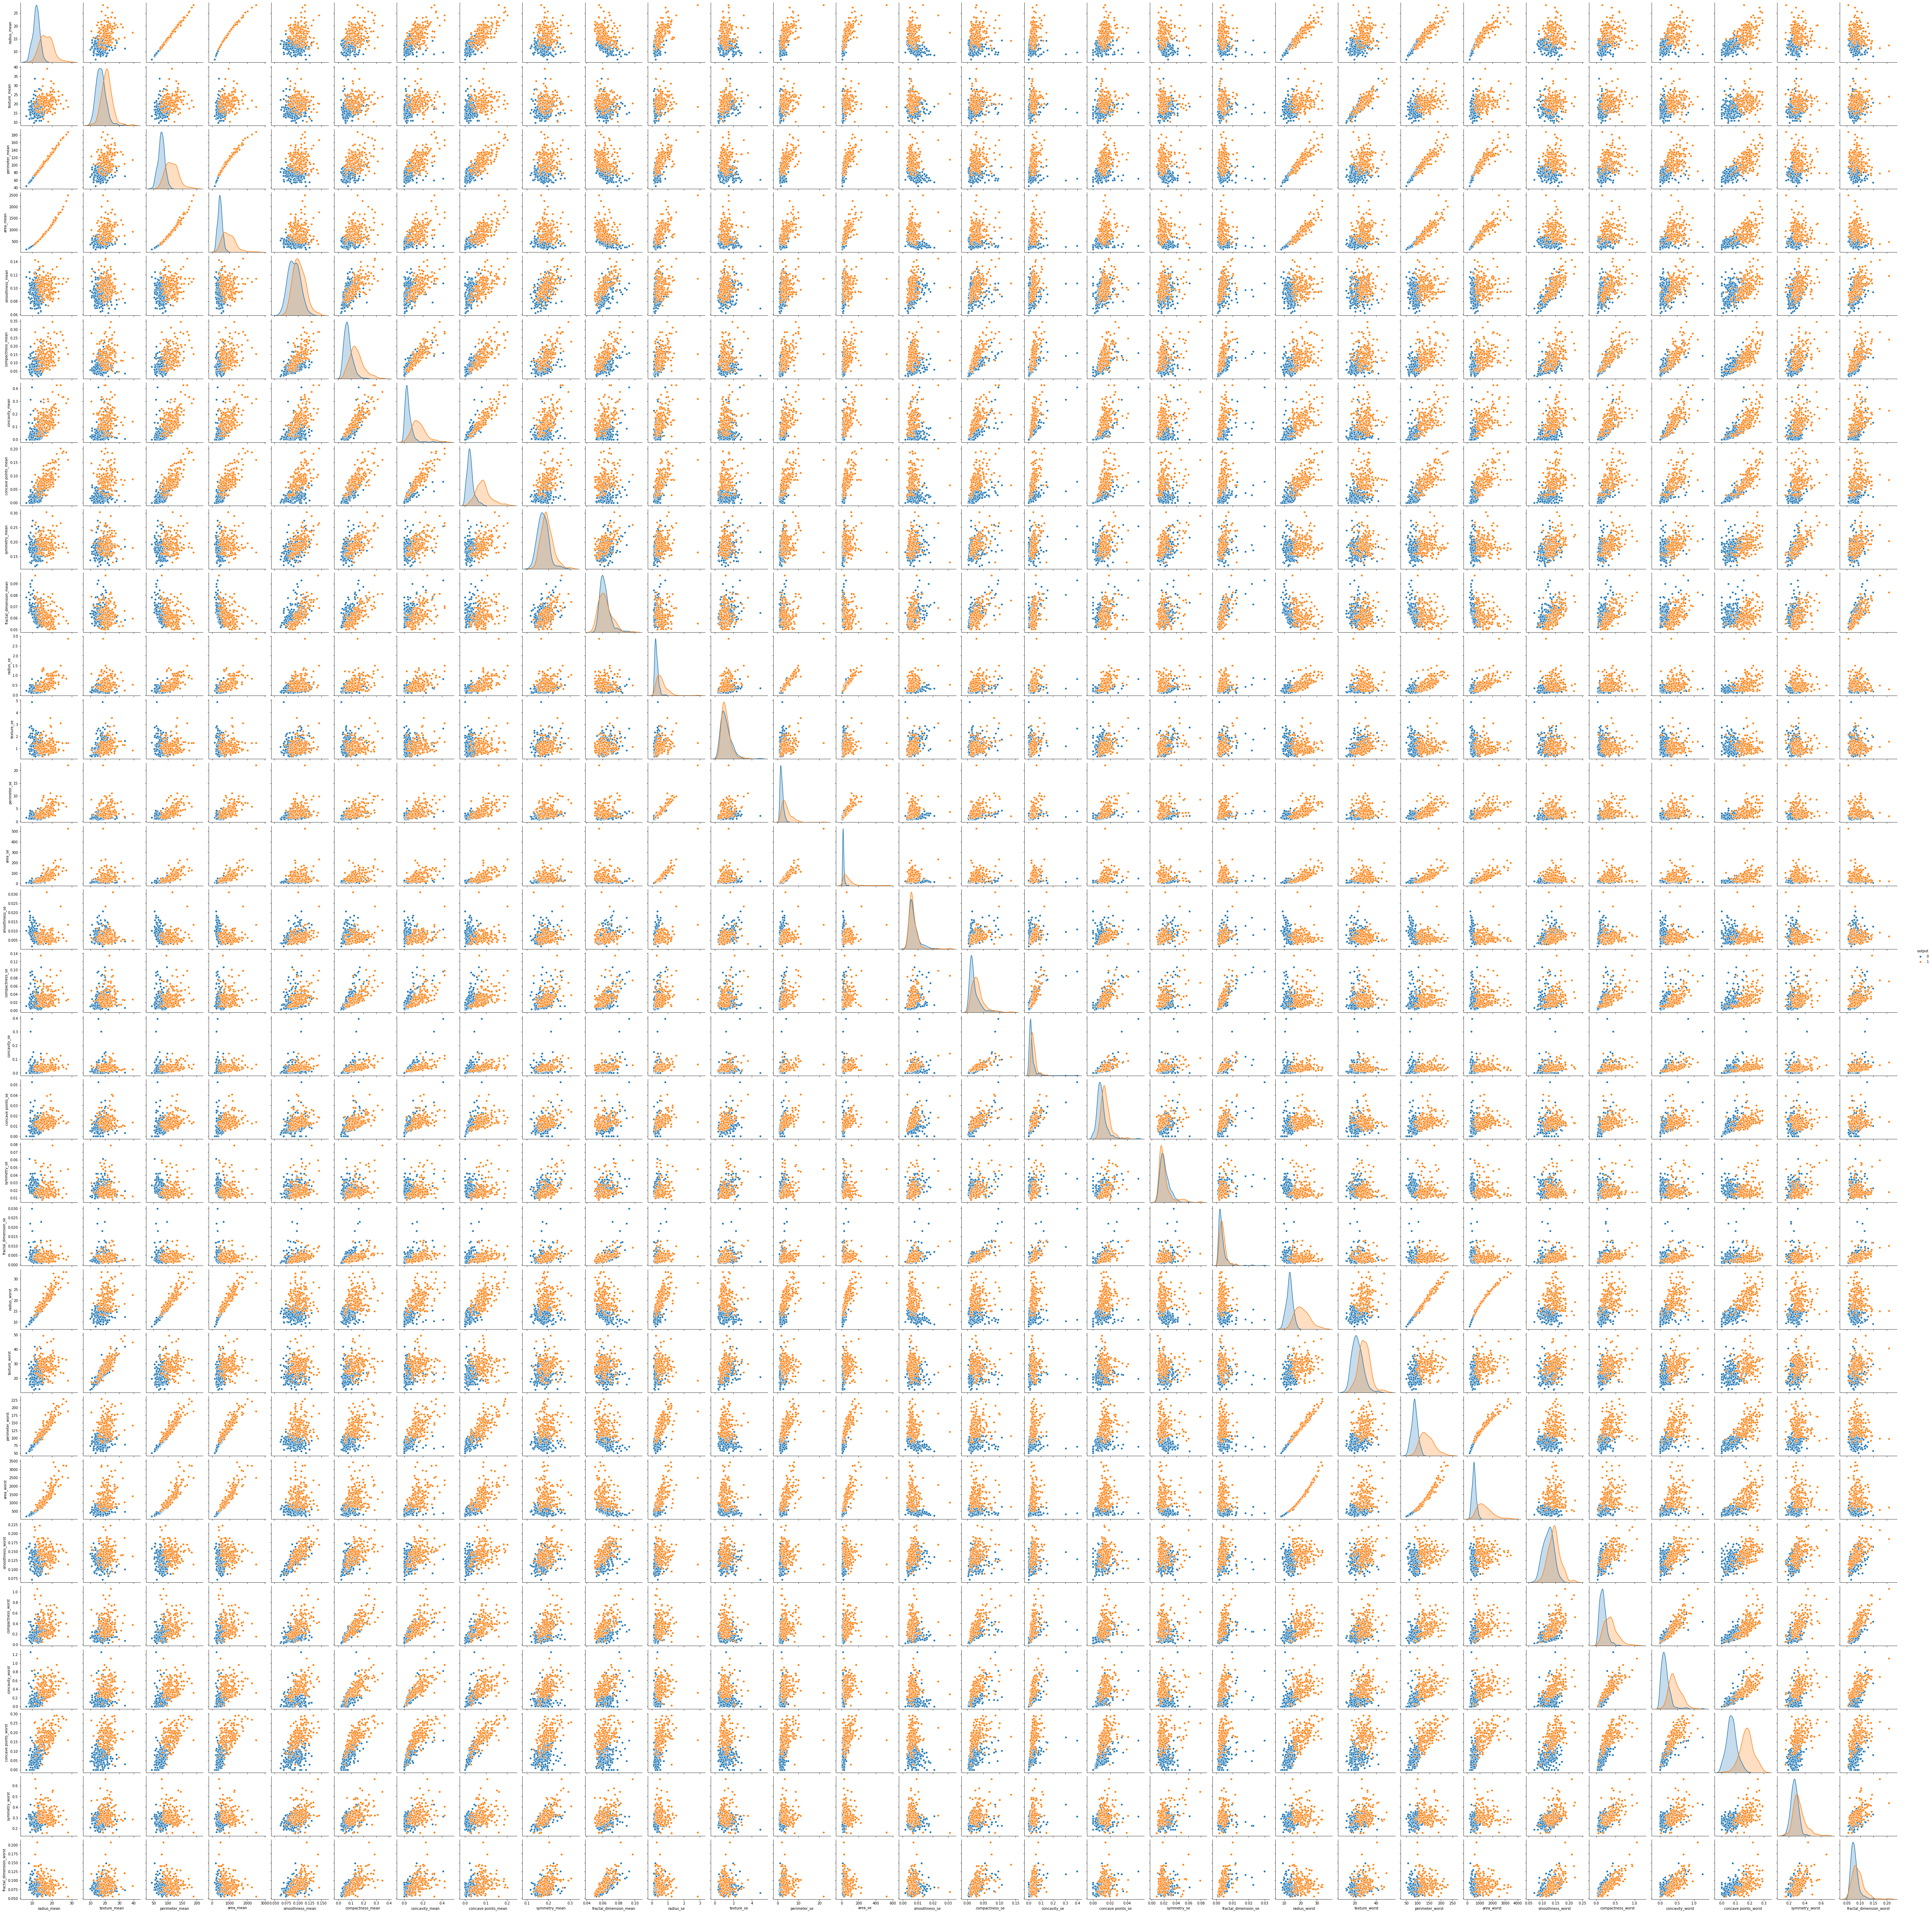

In [8]:
columns_to_plot = list(data.columns)
columns_to_plot.remove('output')
sns.pairplot(data, hue='output', vars=columns_to_plot) 

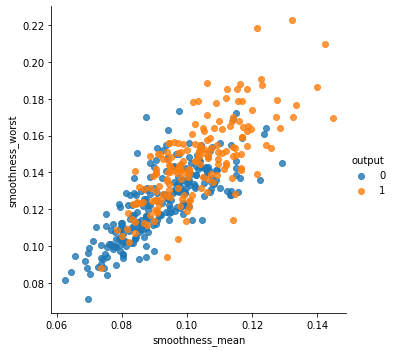

In [9]:
sns.lmplot(x='smoothness_mean', y='smoothness_worst', hue='output', data=data, fit_reg=False)

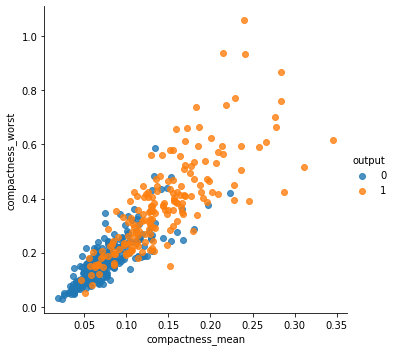

In [10]:
sns.lmplot(x='compactness_mean', y='compactness_worst', hue='output', data=data, fit_reg=False)

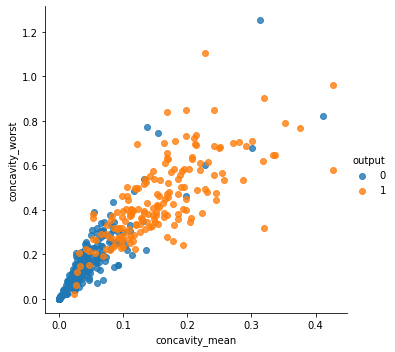

In [11]:
sns.lmplot(x='concavity_mean', y='concavity_worst', hue='output', data=data, fit_reg=False)

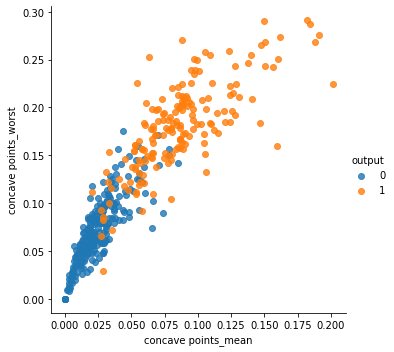

In [12]:
sns.lmplot(x='concave points_mean', y='concave points_worst', hue='output', data=data, fit_reg=False)

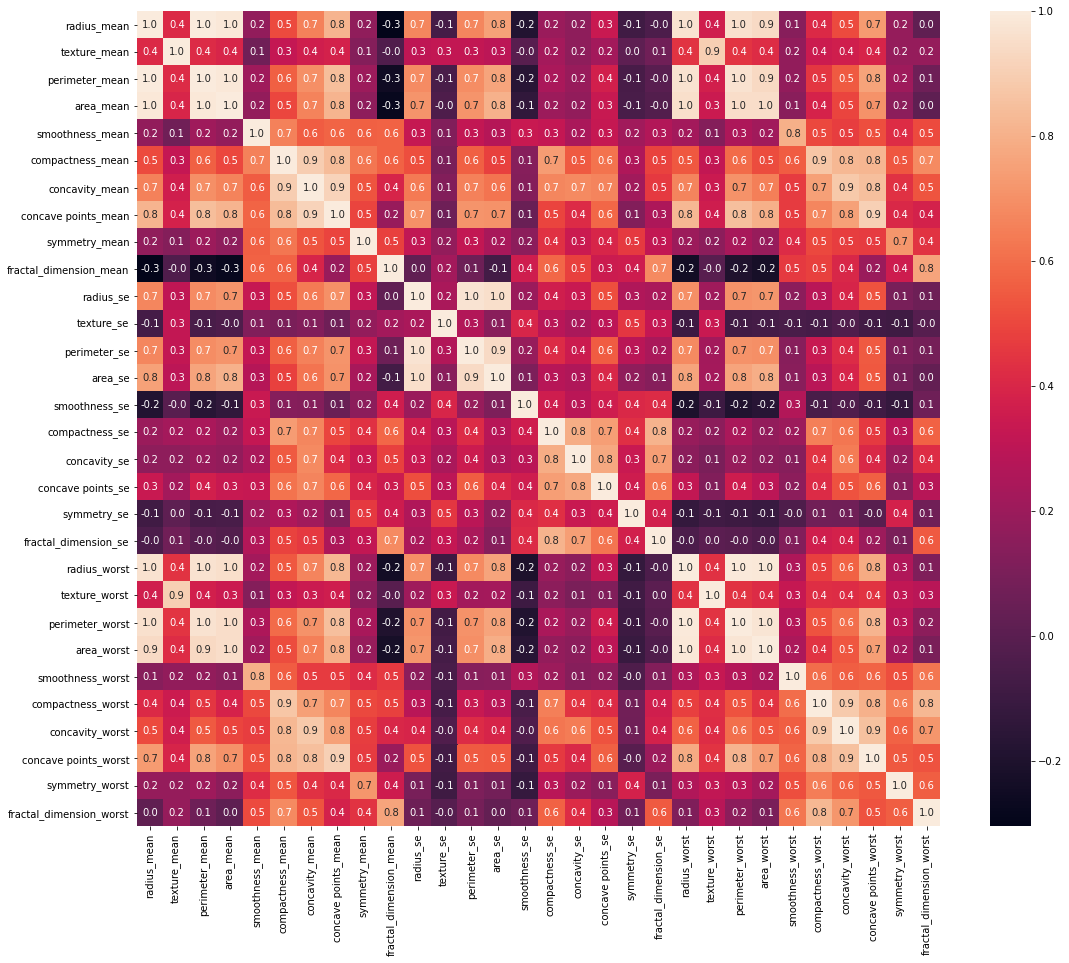

In [13]:
plt.figure(figsize=(18,15))
sns.heatmap(data.corr(), annot=True, fmt=".1f")

In [0]:
np.random.seed(64)

In [0]:
from sklearn.model_selection import train_test_split
X = data.drop('output', axis=1)
y = data['output']
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print('score on training set:', model.score(x_train, y_train))
print('score on test set:', model.score(x_test, y_test))
print(metrics.classification_report(y_true=y_test, y_pred=pred))

score on training set: 0.9490445859872612
score on test set: 0.9428571428571428
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        61
           1       0.95      0.91      0.93        44

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105



In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline(
    [
        ('scaler', StandardScaler()), # mean normalization
        ('knn', KNeighborsClassifier(n_neighbors=1))
    ]
)
model.fit(x_train, y_train)
pred = model.predict(x_test)
print('score on training set:', model.score(x_train, y_train))
print('score on test set:', model.score(x_test, y_test))
print(metrics.classification_report(y_true=y_test, y_pred=pred))

score on training set: 1.0
score on test set: 0.9428571428571428
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        61
           1       0.93      0.93      0.93        44

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105



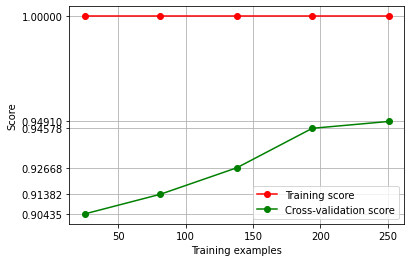

In [18]:
from sklearn.model_selection import learning_curve

def over_underfit_plot(model, X, y):
    plt.figure()


    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()


    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.yticks(sorted(set(np.append(train_scores_mean, test_scores_mean))))


over_underfit_plot(model, x_train, y_train)

                            score
symmetry_mean            0.002458
symmetry_se              0.002793
fractal_dimension_mean   0.003467
texture_se               0.003601
smoothness_se            0.003936
concave points_se        0.004233
compactness_se           0.004238
fractal_dimension_se     0.004954
smoothness_mean          0.005308
concavity_se             0.005446
symmetry_worst           0.006811
fractal_dimension_worst  0.007001
perimeter_se             0.008562
radius_se                0.009270
compactness_mean         0.013625
compactness_worst        0.017805
smoothness_worst         0.018468
texture_mean             0.019326
texture_worst            0.026735
area_se                  0.027221
area_mean                0.033011
perimeter_mean           0.043905
concavity_worst          0.048400
radius_mean              0.049480
concavity_mean           0.058955
concave points_mean      0.090614
area_worst               0.099538
concave points_worst     0.113254
perimeter_wors

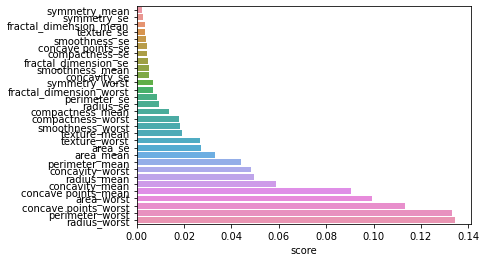

In [19]:
from sklearn.ensemble import RandomForestClassifier

model_feature_importance = RandomForestClassifier(n_estimators=1000).fit(x_train, y_train).feature_importances_
feature_scores = pd.DataFrame({'score':model_feature_importance}, index=list(x_train.columns)).sort_values('score')
print(feature_scores)
sns.barplot(feature_scores['score'], feature_scores.index)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

model = Pipeline(
    [
        ('select', SelectFromModel(RandomForestClassifier(n_estimators=1000), threshold=0.06)),
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=1))
    ]
)


model.fit(x_train, y_train)
pred = model.predict(x_test)
print('score on training set:', model.score(x_train, y_train))
print('score on test set:', model.score(x_test, y_test))
print(metrics.classification_report(y_true=y_test, y_pred=pred))

score on training set: 1.0
score on test set: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        61
           1       0.91      0.93      0.92        44

    accuracy                           0.93       105
   macro avg       0.93      0.93      0.93       105
weighted avg       0.93      0.93      0.93       105

